In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import re
import logging

from src import eda, datasets

DEBUG:matplotlib:matplotlib data path: /Users/bubblegum_doubledrops/Library/Mobile Documents/com~apple~CloudDocs/0prio - Important heavy backups/IronHack/big_projects/end-to-end-data-analysis/venv/lib/python3.13/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/Users/bubblegum_doubledrops/.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is darwin
DEBUG:matplotlib:CACHEDIR=/Users/bubblegum_doubledrops/.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /Users/bubblegum_doubledrops/.matplotlib/fontlist-v390.json


In [2]:
logging.getLogger().setLevel(logging.DEBUG)

In [3]:
project_pack = datasets.DatasetPack(restore=True)

INFO:root:Restoring backup: /Users/bubblegum_doubledrops/Library/Mobile Documents/com~apple~CloudDocs/0prio - Important heavy backups/IronHack/big_projects/end-to-end-data-analysis/datasets/_dataset_pack_end-to-end-data-analysis.json
INFO:root:Restoring dataframe from backup: /Users/bubblegum_doubledrops/Library/Mobile Documents/com~apple~CloudDocs/0prio - Important heavy backups/IronHack/big_projects/end-to-end-data-analysis/datasets/df_bandcamp_sales.pkl
INFO:root:Restoring dataframe from backup: /Users/bubblegum_doubledrops/Library/Mobile Documents/com~apple~CloudDocs/0prio - Important heavy backups/IronHack/big_projects/end-to-end-data-analysis/datasets/df_discogs_artists.pkl
INFO:root:Restoring dataframe from backup: /Users/bubblegum_doubledrops/Library/Mobile Documents/com~apple~CloudDocs/0prio - Important heavy backups/IronHack/big_projects/end-to-end-data-analysis/datasets/df_discogs_releases.pkl
INFO:root:Backup restored successfully from /Users/bubblegum_doubledrops/Library/M

In [5]:
print("Copy the output as code to run in the next cell")
# TODO: implement DatasetPack.labels() to return a list
for label in project_pack.dictionary.keys():
    print(f"{label} = project_pack.dictionary['{label}'].dataframe")

Copy the output as code to run in the next cell
df_bandcamp_sales = project_pack.dictionary['df_bandcamp_sales'].dataframe
df_discogs_artists = project_pack.dictionary['df_discogs_artists'].dataframe
df_discogs_releases = project_pack.dictionary['df_discogs_releases'].dataframe


In [6]:
df_bandcamp_sales = project_pack.dictionary['df_bandcamp_sales'].dataframe
df_discogs_artists = project_pack.dictionary['df_discogs_artists'].dataframe
df_discogs_releases = project_pack.dictionary['df_discogs_releases'].dataframe

### Frequency counts for df_bandcamp_sales product types

As we see from the auto-EDA output:

- Column "item_type" has 4 unique values.

  -- Unique values are:
 ['a' 'p' 't' 'b']

- Column "slug_type" has 3 unique values.

  -- Unique values are:
 ['a' 't' 'p' nan]

Both columns contain product type codes.

```
-- a: for albums; 
--- in 'item_type': a stands for all album types;
--- in 'slug_type': a stands only for digital albums;
-- t: for digital single tracks;
-- p: for physical items: merchendise or hard media (vynil/CD releases);
--- in 'item_type': p stands for all physical items;
--- in 'slug_type': p stands only for merch;
-- b: type-surprise, it was missing from the source description.
```

In [7]:
df_product_types = df_bandcamp_sales[["item_type", "slug_type", "item_description"]]
df_product_types.sample(3)

,item_type,slug_type,item_description
437752,a,a,cosmic ground 5
392832,p,p,Bonobo T-shirt (organic cotton)
986287,t,t,Call Them Up


In [8]:
# Unique values
item_types = ['a', 'p', 't', 'b']
slug_types = ['a', 't', 'p', None]

# Generate all possible combinations
combinations = list(itertools.product(item_types, slug_types))

# Create separate DataFrames for each combination and store them in a dictionary
df_combinations = {}

for item, slug in combinations:
    # Filter the main DataFrame for matching item_type and slug_type
    df_filtered = df_product_types[
        (df_product_types["item_type"] == item) &
        (df_product_types["slug_type"] == slug)
    ]
    
    # Randomly sample 5 rows (or take all if less than 5)
    df_sampled = df_filtered.sample(n=min(5, len(df_filtered)), random_state=42)

    # Store in dictionary with the combination as key
    df_combinations[(item, slug)] = df_sampled

# Display all the filtered DataFrames
for key, df in df_combinations.items():
    print(f"Combination: {key}")
    display(df)

Combination: ('a', 'a')


,item_type,slug_type,item_description
343476,a,a,How Ill Thy World Is Ordered
224031,a,a,Sputnik Tape
154459,a,a,Curse
572578,a,a,hello kitty skates to the fuckin CEMETARY
335403,a,a,The Silent Tree


Combination: ('a', 't')


,item_type,slug_type,item_description


Combination: ('a', 'p')


,item_type,slug_type,item_description


Combination: ('a', None)


,item_type,slug_type,item_description


Combination: ('p', 'a')


,item_type,slug_type,item_description
863442,p,a,"The Hotelier - Home, Like Noplace Is There Vinyl"
794049,p,a,Jewel-case CD version
371148,p,a,"12"" VINYL EDITION - GREEN/YELLOW MARBLE VINYL"
961317,p,a,Ltd Yellow Swirl LP
395427,p,a,"Limited Edition 7"" Vinyl"


Combination: ('p', 't')


,item_type,slug_type,item_description


Combination: ('p', 'p')


,item_type,slug_type,item_description
150857,p,p,SPECIAL OFFER : MORD071 - Tensal - Tyranny EP ...
458407,p,p,'Doomswayers' Vinyl/T-shirt/Book Bundle
868416,p,p,"Limited Edition ""Dump Gawd"" Hoodie"
376245,p,p,"Take Heart, Take Care CD"
173111,p,p,JESSA Hackeysack


Combination: ('p', None)


,item_type,slug_type,item_description


Combination: ('t', 'a')


,item_type,slug_type,item_description


Combination: ('t', 't')


,item_type,slug_type,item_description
71343,t,t,Antares - Ride On A Meteorite (JKS Rave Euromi...
492093,t,t,Sound Of Da Police (Ahmed Sirour remix)
556225,t,t,Detroit Smash
460360,t,t,Nebenan
589927,t,t,Quentin Ravn - Strippin down


Combination: ('t', 'p')


,item_type,slug_type,item_description


Combination: ('t', None)


,item_type,slug_type,item_description


Combination: ('b', 'a')


,item_type,slug_type,item_description


Combination: ('b', 't')


,item_type,slug_type,item_description


Combination: ('b', 'p')


,item_type,slug_type,item_description


Combination: ('b', None)


,item_type,slug_type,item_description


In [9]:
df_bandcamp_sales["media_type"] = "other" 
# ('a', 'a') -> "digital" for digital album sales
df_bandcamp_sales.loc[
    (df_bandcamp_sales["item_type"] == 'a') & (df_bandcamp_sales["slug_type"] == 'a'),
    "media_type"
] = "digital"

# ('t', 't') -> "digital" for digital single track sales
df_bandcamp_sales.loc[
    (df_bandcamp_sales["item_type"] == 't') & (df_bandcamp_sales["slug_type"] == 't'),
    "media_type"
] = "digital"


In [10]:
# Create subset where item_type is 'p' for better performance
df_subset = df_bandcamp_sales[df_bandcamp_sales["item_type"] == "p"]

In [11]:
# for physical products lookup for CD in description
df_subset.loc[
    (df_bandcamp_sales["item_description"].str.contains("CD", case=False, na=False)),
    "media_type"
] = "CD"

# Merge changes back into the original dataframe
df_bandcamp_sales.update(df_subset)


In [12]:
# for physical products lookup for CD in description
df_subset.loc[
    (df_bandcamp_sales["item_description"].str.contains("Compact Disc", case=False, na=False)),
    "media_type"
] = "CD"

# Merge changes back into the original dataframe
df_bandcamp_sales.update(df_subset)

In [13]:
# synonyms for vynil in regexp for parsing strings:
vinyl_synonyms = [
    r"\bVinyl\b",      # Matches 'Vinyl'
    r"(\d+LP|LP)\b",         # Matches 'LP', '2LP', etc
    r"\bDouble\b",     # Matches 'Double'
    r"\bEP\d*\b",      # Matches 'EP', 'EP2', 'EP3' etc.
    r"\b7['’]?\b",    # Matches '12' or '12"' (12-inch)
    r"\b12['’]?\b",    # Matches '12' or '12"' (12-inch)
    r"\b45RPM\b",      # Matches '45RPM'
    r"\b33RPM\b",      # Matches '33RPM'
    r"\bRecord\b",     # Matches 'Record'
    r"\bPicture\s*Disc\b", # Matches 'Picture Disc' - Special edition vinyl releases
]

# Compile regex pattern for all Vinyl synonyms
vinyl_pattern = re.compile("|".join(vinyl_synonyms), flags=re.IGNORECASE)

In [14]:
# Apply regex match only within the subset
df_subset.loc[
    df_subset["item_description"].str.contains(vinyl_pattern, na=False),
    "media_type"
] = "Vinyl"

# Merge changes back into the original dataframe
df_bandcamp_sales.update(df_subset)

/var/folders/mw/fk43c9sj50d252zw3crnw2080000gn/T/ipykernel_14783/3723003539.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_subset["item_description"].str.contains(vinyl_pattern, na=False),


In [15]:
# for physical products lookup for Cassette in description
df_subset.loc[
    (df_bandcamp_sales["item_description"].str.contains("Cassette", case=False, na=False)),
    "media_type"
] = "Cassette"

# Merge changes back into the original dataframe
df_bandcamp_sales.update(df_subset)

In [16]:
df_bandcamp_sales.loc[
    (df_bandcamp_sales["item_type"] == "p") & 
    (df_bandcamp_sales["slug_type"] == "a") & 
    (df_bandcamp_sales["media_type"] == "other"),
    "media_type"
] = "CD or Vinyl"

In [18]:
df_bandcamp_sales[["media_type", "item_type", "slug_type", "item_description"]].sample(5)

,media_type,item_type,slug_type,item_description
392628,other,p,p,Subversion Through Jazz: The birth of British ...
692760,Vinyl,p,a,"""Moon colored"" Vinyl Gatefold 2x12 only with o..."
875598,Cassette,p,a,Limited Edition Double-Cassette
839973,digital,a,a,Maybe It's Time (Demo) b/w Alabama Sky
189051,digital,a,a,Mothertime


#### Removing redundant data

In [19]:
# Step 1: Drop rows where media_type == 'other'
df_bandcamp_sales = df_bandcamp_sales[df_bandcamp_sales["media_type"] != "other"]

# Step 2: Drop the columns 'item_type' and 'slug_type'
df_bandcamp_sales.drop(columns=["item_type", "slug_type"], inplace=True)

/var/folders/mw/fk43c9sj50d252zw3crnw2080000gn/T/ipykernel_14783/4267973152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bandcamp_sales.drop(columns=["item_type", "slug_type"], inplace=True)


In [30]:
df_bandcamp_sales[["media_type", "item_description"]].sample(5)

,media_type,item_description
217467,digital,Forever 2
304403,digital,Ephemeral Life.
626598,digital,From Exile
285519,CD,Gypsy (CD)
134690,digital,Tulpa


#### backup the dataframe

In [33]:
project_pack.dictionary['df_bandcamp_sales'].backup()

INFO:root:Backup file is created: /Users/bubblegum_doubledrops/Library/Mobile Documents/com~apple~CloudDocs/0prio - Important heavy backups/IronHack/big_projects/end-to-end-data-analysis/datasets/df_bandcamp_sales.pkl


In [34]:
# uncomment to restore from here:
# project_pack = datasets.DatasetPack(restore=True)

#### Frequency table and chart for df_bandcamp_sales['media_type']

In [35]:
# Create a frequency table for 'media_type' as a DataFrame
media_type_counts = df_bandcamp_sales["media_type"].value_counts().reset_index()
media_type_counts.columns = ["media_type", "count"]

media_type_counts

,media_type,count
0,digital,752599
1,Vinyl,107775
2,CD,39647
3,CD or Vinyl,23142
4,Cassette,22715


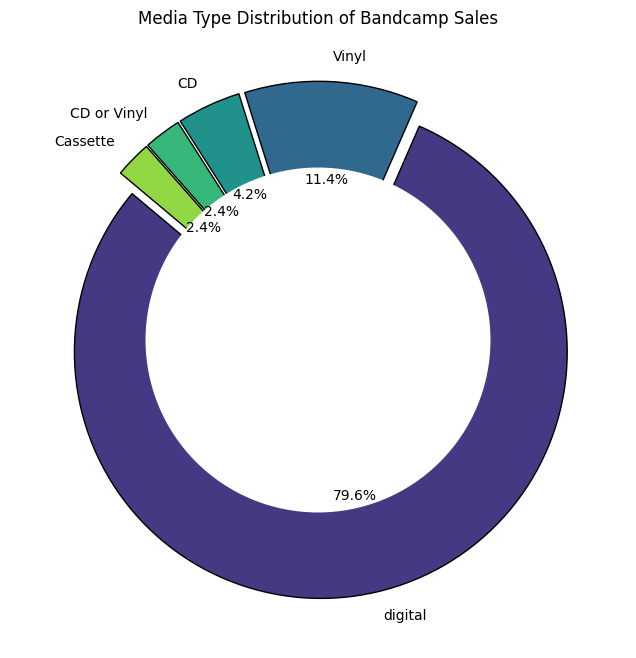

In [40]:
logging.getLogger().setLevel(logging.ERROR)

# Create a donut chart for media_type distribution
plt.figure(figsize=(8, 8))

# Define colors and explode values for better visualization
colors = sns.color_palette("viridis", len(media_type_counts))
explode = [0.05] * len(media_type_counts)  # Slightly separate each slice

# Create the pie chart with a white circle in the center to make it a donut chart
plt.pie(
    media_type_counts["count"],
    labels=media_type_counts["media_type"],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    wedgeprops={"edgecolor": "black"}
)

# Draw a white circle in the center
center_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(center_circle)

# Set title and display the plot
plt.title("Media Type Distribution of Bandcamp Sales")
plt.show()

logging.getLogger().setLevel(logging.DEBUG)

### Frequency table for df_discogs_artists["artist_data_quality"]

As we see from the auto-EDA output:
- Column "artist_data_quality" has 6 unique values.

  -- Unique values are:

 ['Needs Vote' 'Correct' 'Needs Major Changes' 'Complete and Correct'
 'Needs Minor Changes' 'Entirely Incorrect']

In [41]:
# Create a frequency table for 'artist_data_quality' as a DataFrame
artist_data_quality_counts = df_discogs_artists["artist_data_quality"].value_counts().reset_index()
artist_data_quality_counts.columns = ["artist_data_quality", "count"]

artist_data_quality_counts

,artist_data_quality,count
0,Needs Major Changes,6014661
1,Needs Vote,2518536
2,Correct,657203
3,Complete and Correct,4211
4,Needs Minor Changes,260
5,Entirely Incorrect,36


In [42]:
# Drop rows with 'Entirely Incorrect' artist data
df_discogs_artists = df_discogs_artists[df_discogs_artists["artist_data_quality"] != "Entirely Incorrect"]

#### backup the dataframe

In [43]:
project_pack.dictionary['df_discogs_artists'].backup()

INFO:root:Backup file is created: /Users/bubblegum_doubledrops/Library/Mobile Documents/com~apple~CloudDocs/0prio - Important heavy backups/IronHack/big_projects/end-to-end-data-analysis/datasets/df_discogs_artists.pkl


In [ ]:
# uncomment to restore from here:
# project_pack = datasets.DatasetPack(restore=True)

### Frequency counts for df_discogs_releases["genre"]

As we see from the auto-EDA output:

- Column "genre" has 15 unique values.

  -- Unique values are:
  
 ['Electronic' 'Hip Hop' 'Non-Music' 'Jazz' 'Rock' 'Latin' 'Funk / Soul'
 'Stage & Screen' 'Pop' 'Reggae' 'Folk, World, & Country' 'Classical'
 'Blues' 'Brass & Military' "Children's" nan]

In [52]:
#  Drop non-music
df_discogs_releases = df_discogs_releases[df_discogs_releases["genre"] != "Non-Music"]

In [62]:
# Create a frequency table for 'artist_data_quality' as a DataFrame
genre_counts = df_discogs_releases["genre"].value_counts().reset_index()
genre_counts.columns = ["genre", "count"]

genre_counts

,genre,count
0,Rock,4414291
1,Electronic,3491910
2,Pop,2546269
3,"Folk, World, & Country",1507122
4,Jazz,1054791
5,Funk / Soul,922087
6,Classical,755037
7,Hip Hop,664307
8,Latin,504809
9,Stage & Screen,360972


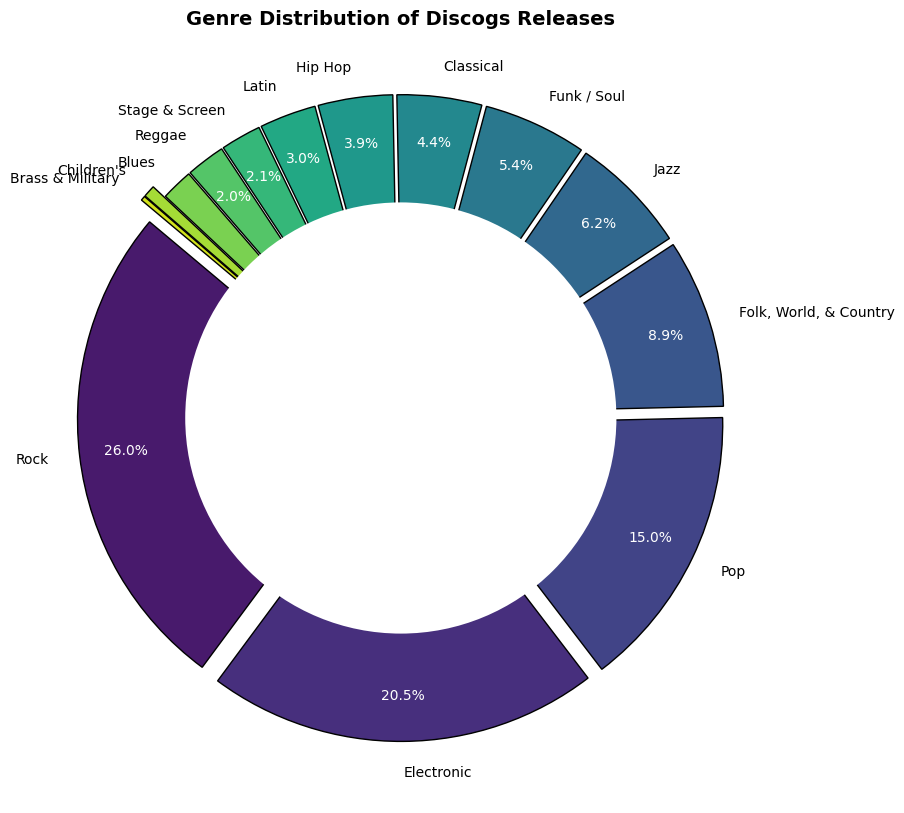

In [64]:
logging.getLogger().setLevel(logging.ERROR)

# Create a frequency table for 'genre' in df_discogs_releases
genre_counts = df_discogs_releases["genre"].value_counts().reset_index()
genre_counts.columns = ["genre", "count"]

# Create a figure for the donut chart
plt.figure(figsize=(10, 10))

# Define colors and explode values for better visualization
colors = sns.color_palette("viridis", len(genre_counts))
explode = [0.1 if count < 200000 else 0.05 for count in genre_counts["count"]]  # Slightly separate small values

# Create the pie chart with a white circle in the center to make it a donut chart
wedges, texts, autotexts = plt.pie(
    genre_counts["count"],
    labels=genre_counts["genre"],
    autopct=lambda p: f'{p:.1f}%' if p > 2 else '',  # Show percentage only for values > 2%
    startangle=140,
    colors=colors,
    explode=explode,
    wedgeprops={"edgecolor": "black"},
    pctdistance=0.85  # Move percentages closer to the center
)

# Adjust label positions for smaller values to avoid overlap
for text in texts:
    text.set_fontsize(10)  # Reduce font size for better spacing
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')  # Ensure visibility

# Draw a white circle in the center
center_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(center_circle)

# Set title and display the plot
plt.title("Genre Distribution of Discogs Releases", fontsize=14, fontweight='bold')
plt.show()

logging.getLogger().setLevel(logging.DEBUG)

### Frequency table for df_discogs_releases["format"]

As we see from the auto-EDA output:
 - Column "format" has 57 unique values.

This is above treshold 20, so the list of values is not auto-generated.

In [48]:
df_discogs_releases["format"].unique()

array(['Vinyl', 'CD', 'Cassette', 'Box Set', 'All Media', 'File',
       'Floppy Disk', 'Flexi-disc', 'DAT', 'Minidisc', 'DVD', 'Lathe Cut',
       'CDV', 'Hybrid', 'VHS', 'Acetate', 'SACD', 'DVDr', 'Shellac',
       '8-Track Cartridge', 'MVD', 'Laserdisc', 'Reel-To-Reel',
       'Memory Stick', 'Betamax', 'DCC', 'UMD', 'Microcassette', 'HD DVD',
       'Blu-ray', 'Pathé Disc', 'Cylinder', 'DualDisc', 'Edison Disc',
       '4-Track Cartridge', 'VHD', 'Blu-ray-R', 'SelectaVision',
       'U-matic', 'Film Reel', 'MiniDV', 'Video8', 'Betacam SP',
       'PlayTape', 'Video 2000', 'Elcaset', 'Wire Recording',
       'NT Cassette', 'Betacam', 'Tefifon', 'RCA Tape Cartridge',
       'Pocket Rocker', 'DC-International', 'Sabamobil',
       'Revere Magnetic Stereo Tape Ca', 'Cartrivision', 'HD DVD-R'],
      dtype=object)

In [50]:
df_discogs_releases["media_type"] = "other"

In [ ]:
formats_vinyl = ['Vinyl', 'Shellac', 'Lathe Cut', 'Acetate', 'Pathé Disc', 'Edison Disc']



## Backup

In [ ]:
for _, dataset in project_pack.dictionary.items():
    dataset.backup()

project_pack.backup_pack()